In [128]:
# Prosjektoppgave PY1010 2024-2025

# Starter med å importere biblioteker jeg blir å trenge.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lagrer filnavnet som en variabel slik at jeg slipper å skrive hele filnavnet flere ganger.
xlsxfil1 = ("support_uke_24.xlsx")

# Lagrer data fra excel filen til en variabel
data = pd.read_excel(xlsxfil1)

# Her lager jeg arrays av hver kolonne
u_dag = data["Ukedag"].values
kl_slett = data["Klokkeslett"].values
varighet = data["Varighet"].values
score = data["Tilfredshet"].values

# Print for å sjekke at alt fungerer som planlagt.
print ("u_dag:", u_dag[:5])
print ("kl_slett:", kl_slett[:5])
print ("varighet:", varighet[:5])
print ("score:", score[:5])

u_dag: ['Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag']
kl_slett: ['08:04:16' '08:04:53' '08:06:31' '08:11:21' '08:20:46']
varighet: ['00:07:12' '00:02:49' '00:08:36' '00:04:34' '00:07:38']
score: [nan  6. nan nan nan]


Text(0, 0.5, 'Henvendelser')

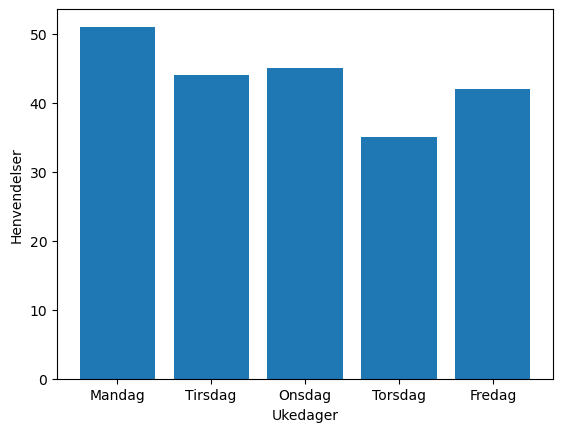

In [129]:
# Jeg har nå lyst til å hente ut antall hendelser per dag og gjøre dette om til et diagram slik at det er lettere å lese.
# Først må jeg lage en liste hvor jeg setter inn mandag til fredag.

ukedager = ["Mandag", "Tirsdag", "Onsdag", "Torsdag", "Fredag"]

# Nå må jeg lage en liste som hver henvendelse på hver dag blir lagt til i.
# For hver gang Mandag dukker opp i kolonnen "Ukedag" i excel filen, blir verdien på posisjon 0 i listen "henvendelser" økt med en.

henvendelser = [0] * 5

for dag in data["Ukedag"]:
    if dag == "Mandag":
        henvendelser[0] += 1
    elif dag == "Tirsdag":
        henvendelser[1] += 1
    elif dag == "Onsdag":
        henvendelser[2] += 1
    elif dag == "Torsdag":
        henvendelser[3] += 1
    elif dag == "Fredag":
        henvendelser[4] += 1


# Nå kan jeg sette opp et enkelt søylediagram med informasjonen jeg har fått lagt inn i listene.

plt.bar(ukedager, henvendelser)
plt.xlabel ("Ukedager")
plt.ylabel ("Henvendelser")

In [130]:
# Nå ønsker jeg å finne ut av hva som er lengst samtaletid og hva som er kortest samtaletid.
# Dette gjør jeg med å bruke varighet variablen jeg brukte tidligere for å lage 2 nye variabler som viser lengste og korteste samtaletid.
# Ved å legge til min() og max() fremfor variablen, vil jeg kunne finne lavest og høyest verdi.


kortest_varighet = min(varighet)
lengst_varighet = max(varighet)

print ("Den korteste samtaletiden er: ",kortest_varighet, "minutter, og den lengste samtaletiden er: ",lengst_varighet, "minutter")

Den korteste samtaletiden er:  00:00:59 minutter, og den lengste samtaletiden er:  00:11:28 minutter


Text(0.5, 1.0, 'Diagram over henvendelser fordelt på klokkeslett')

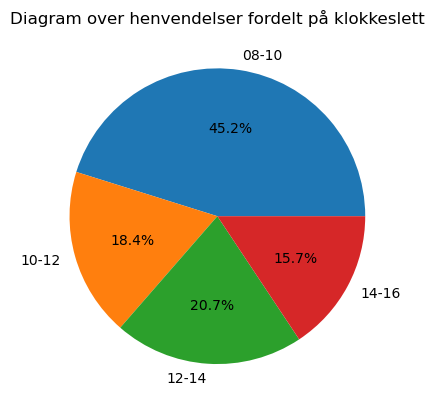

In [140]:
# Jeg ønsker å finne ut av når på døgnet flest folk ringer inn.
# Jeg starter med å lage en dictionary som jeg legger tidsintervallene inn i og gir de en verdi.
tidsintervall = {"08-10": 0, "10-12": 0, "12-14": 0, "14-16": 0}

# Ettersom tidsformatet i excel arket er skrevet HH:MM:SS, må jeg konvertere det til en streng.
# Siden jeg deler strengen på : vil jeg få ut tallene i en liste som da gir meg f.eks ["09", "15", "30"]
# Jeg henter da ut det første tallet i listen som er [09] og gjør dette om til et heltall ved int [9]

# Da vil de forskjellige tidsintervallene komme i heltall og bli sortert til riktig plass i dictionaryen ved at verdien dens øker.
for tid in data["Klokkeslett"]:
    tid = int(str(tid).split(":")[0])
    if 8 <= tid < 10:
        tidsintervall["08-10"] += 1
    elif 10 <= tid < 12:
        tidsintervall["10-12"] += 1
    elif 12 <= tid < 14:
        tidsintervall["12-14"] += 1
    elif 14 <= tid < 16:
        tidsintervall["14-16"] += 1
        
# Nå kan jeg gjøre det mer oversiktlig ved å lage et "kakediagram"
# Her bruker jeg plt.pie for å lage selve diagrammet, og henter inn verdiene fra dictionaryen ned .values()
# I tillegg bruker jeg .keys() og autopct for å få lagt prosentverdiene over de rette plassne, og for å sette klokkeslettene rundt diagrammet slik at det er enkelt å lese.
# Til slutt gir jeg det en tittel med plt.title

plt.pie (tidsintervall.values(), labels=tidsintervall.keys(), autopct="%2.1f%%")
plt.title("Diagram over henvendelser fordelt på klokkeslett")

In [142]:
# For å finne ut NPS, må jeg starte med å lage en variabel til hver kategori man ønsker.
# Her ønsker jeg å finne ut de negative, positive og de nøytrale.


negativ_tilbakemelding = 0
nøytral_tilbakemelding = 0
positiv_tilbakemelding = 0

# Her henter jeg ut resultatene fra riktig kolonne i excel arket.
# Så fordeler jeg dem ut slik at poengsum 1-6 ansees som negativt, 7-8 ansees som nøytralt og 9-10 ansees som positivt.
# Jeg ønsker kun å hente tilbakemeldinger fra de som faktisk har lagt igjen tilbakemelding.
# Derfor bruker jeg pd.notna for å kun få med meg resultatene der det er lagt igjen tilbakemelding.
# Svarene blir da fordelt ved at det plir plusset på 1 i riktig variabel.

for poeng in data["Tilfredshet"]:
    if pd.notna(poeng):
        poeng = int(poeng)
    if 1 <= poeng <= 6:
        negativ_tilbakemelding += 1
    elif 7 <= poeng <= 8:
        nøytral_tilbakemelding += 1
    elif 9 <= poeng <= 10:
        positiv_tilbakemelding += 1

# For å finne totalt antall svar, plusser jeg bare sammen alle negative, positive og nøytrale tilbakeneldingene
# Jeg lager så en variabel med den positive prosenten og en med den negative prosenten.
# Så finner jeg ut NPS ved å trekke fra den negative prosenten fra den positive prosenten.

antall_svar = (negativ_tilbakemelding + nøytral_tilbakemelding + positiv_tilbakemelding)

prosent_positive_svar = (positiv_tilbakemelding / antall_svar) * 100
prosent_negative_svar = (negativ_tilbakemelding / antall_svar) * 100

nps = (prosent_positive_svar - prosent_negative_svar)

print ("Totalt antall svar er:",antall_svar,"av disse, var",f"{prosent_positive_svar:.2f}%"," prosent svar positive og ",f"{prosent_negative_svar:.2f}%" " svar var negative")
print ("Dette gir oss en NPS på:",f"{nps:.2f}%")

Totalt antall svar er: 43 av disse, var 65.12%  prosent svar positive og  23.26% svar var negative
Dette gir oss en NPS på: 41.86%
